# Computational Experiment 1: Calculating Potentials

Discussion: 7 September 2021 (Jeremy)

In this experiment, you will use some python code to numerically integrate the potential for some spherically-symmetric density distributions.

Before you begin, **make sure to read through the full notebook and understand what each function does**. Pay special attention to anything that has a **FIXME** note, which you will need to edit. Also make sure that you have ``numpy``, ``scipy``, ``galpy``, ``astropy``, and ``matplotlib`` installed (we don't technically need ``astropy`` for this one, but we will soon and it is an essential package to have if you are doing anything astro-related in python).

## 0. Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from galpy import potential as pot
from scipy.integrate import quad

## 1. Define density and analytic potential for Plummer distribution.

Note that ``galpy`` works best in "natural" units where $G=1$, so in this experiment we will use that convention. We will be more explicity about using physical units in future experiments. Also note that I've assumed $b=1$ and $M=1$.

In [2]:
# Functions that define the density and potential for a variety of density profiles.
def rho_plummer(r):
    "Density of a Plummer model: BT equation 2.44b."
    return 3.0*(1.0 + r*r)**(-2.5) / (4.0*np.pi)

def pot_plummer(r):
    "Analytic potential of a Plummer model: BT equation 2.44a."
    # Note that the factor of G is missing here. We will be doing a lot of comparing
    # to galpy in this exercise, which uses dimensionless units where G=1, so we will
    # adopt those too for now.
    return -1.0/np.sqrt(r*r+1.0)

## 2. Routine to calculate potential numerically from a density distribution.

In [3]:
def pot_numerical(r, dens):
    "Numerically integrate the potential from the function dens at radii r."
    
    # first define two convenience functions for the integration, which return the
    # density times r or times r squared.
    def rho_times_r(r):
        "rho(r) r. Used as the integrand for part of BT equation 2.28"
        return dens(r)*r
        
    def rho_times_r2(r):
        "rho(r) r^2. Used as the integrand for part of BT equation 2.28"
        return dens(r)*r*r
    
    # inner_integral is the first integral from BT equation 2.28
    inner_integral = np.array([quad(rho_times_r2, 0.0, x)[0] for x in r])
    # outer_integral is the second integral from BT equation 2.28
    outer_integral = np.array([quad(rho_times_r, x, np.inf)[0] for x in r])
    
    # BT equation 2.28: -4 pi G (inner_integral/r + outer_integral)
    # (but using G=1)
    return -4.0 * np.pi * (inner_integral/r + outer_integral)

## 3. Set up what you want to plot. These can be changed to plot different functions as you define them later on.

Note that there are **FIXME**s in all of these that you will want to come back to later.

In [4]:
# FIXME: TO CHANGE TO A DIFFERENT DENSITY DISTRIBUTION, REPLACE
# THESE WITH THE NAMES O?F YOUR DENSITY FUNCTION AND ANALYTIC
# POTENTIAL FUNCTION (AND AN APPROPRIATE LABEL).
# IF YOU DON'T HAVE AN ANALYTIC FORM OF THE POTENTIAL, YOU CAN SAY pot_func = False
rho_func = rho_NFW
pot_func = pot_NFW
label = 'NFW'

NameError: name 'rho_NFW' is not defined

In [14]:
# FIXME: ONCE YOU'VE CONVINCED YOURSELF THAT YOUR NUMERICAL INTEGRATION VERSION OF THE
# POTENTIAL WORKS, YOU DON'T NEED TO PLOT BOTH IT AND GALPY'S VERSION, SO YOU CAN
# SET THIS TO False.
plot_my_pot_numerical = False

In [8]:
# FIXME: TO USE ONE OF GALPY'S BUILT-IN POTENTIALS, PUT IT HERE.
# IF THERE IS NO BUILT-IN VERSION, YOU CAN SAY pot_galpy = False
pot_galpy = pot.NFWPotential(amp=4.0 * np.pi, a=1.0)

In [9]:
# galpy has a built-in option to create a potential from a density distribution
pot_galpy_from_density = pot.AnySphericalPotential(dens=rho_func)

## 4. Plot potential and density profile.

In [10]:
# create an array that contains the values along the x axis
xax = 10**np.arange(-2, 3, 0.05)

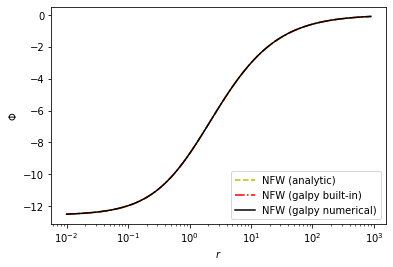

In [15]:
# Create a figure showing the potential:
# Numerical potential
if plot_my_pot_numerical:
    plt.plot(xax, pot_numerical(xax, rho_func), 'b.', label=label+' (numerical)')
# add a line for the analytic potential if it exists
if pot_func:
    plt.plot(xax, pot_func(xax), 'y--', label=label+' (analytic)')
# add a line for the galpy potential if it exists. Needs to be multiplied by G because
# galpy uses internal dimensionless units
if pot_galpy:
    plt.plot(xax, pot_galpy(xax,0), 'r-.', label=label+' (galpy built-in)')
# add a line for galpy's numerical solution given the density
plt.plot(xax, [pot_galpy_from_density(x,0) for x in xax], 'k-', ms=2, label=label+' (galpy numerical)')
# Make the x scale logarithmic
plt.xscale('log')

# add axis labels
plt.xlabel('$r$')
plt.ylabel('$\Phi$')
# add the legend
plt.legend(loc='lower right')
# save the figure to a file
plt.savefig(label+'_potential.png')

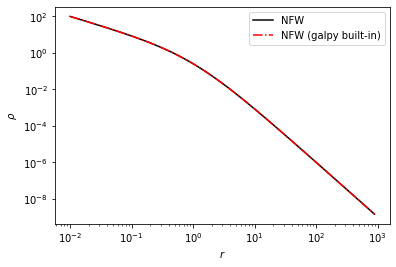

In [16]:
# Create a figure showing the density:
plt.figure()
# log-log plot of the density
plt.loglog(xax, rho_func(xax), 'k-', label=label)
# add a line for galpy's built-in if it exists
if pot_galpy:
    plt.plot(xax, pot_galpy.dens(xax,0), 'r-.', label=label+' (galpy built-in)')
# add axis labels
plt.xlabel('$r$')
plt.ylabel('$\\rho$')
# add the legend
plt.legend()
# save the figure to a file
plt.savefig(label+'_density.png')

**Look at these plots!** What do you learn from them? Does the density go to the expected limits at $r \ll 1$ and $r \gg b$?

Note that these figures are saved as PNG files with names ``Plummer_potential.png`` and ``Plummer_density.png``.

## 5. Calculate the circular velocity and escape velocity

First it is convenient to define a helper function that integrates the enclosed mass given a density distribution. You can call this function from within your functions.

In [17]:
def enclosed_mass(r, dens):
    "Enclosed mass"
    
    # first define a convenience function for the integration, which returns the
    # density times r squared
    def rho_times_r2(r):
        "rho(r) r^2. Used as the integrand for part of BT equation 2.28"
        return dens(r) * r * r
        
    # integral is from BT equation 2.27b
    integral = np.array([quad(rho_times_r2, 0.0, x)[0] for x in r])
    return 4.0 * np.pi * integral

**FIXME:** Finish the ``vesc`` function so that it calculates the escape velocity for a potential (BT equation 2.31) and the ``vcirc`` function so that it calculates the circular velocity (BT equation 2.29; you might find it convenient to call the ``enclosed_mass`` function from within ``vcirc``).

In [18]:
def vesc(r, pot):
    "Escape veloctiy"
    "v_esc(r) = sqrt(2 * Phi(r)). BT equation 2.31"
    # FIXME: PUT IN YOUR CODE HERE
    return np.sqrt(2.0 * np.absolute(pot(r)))
    
def vcirc (r, rho):
    "Circular velocity"
    "v_circ = sqrt(G * M_enc / r). BT equation 2.29"
    # FIXME: PUT IN YOUR CODE HERE.
    # YOU MIGHT FIND THE enclosed_mass FUNCTION HELPFUL, WHICH RETURNS THE ENCLOSED MASS
    # WITHIN A GIVEN RADIUS FOR A GALPY POTENTIAL OBJECT.
    return np.sqrt((enclosed_mass(r, rho)) / r)

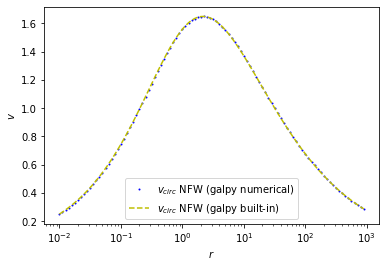

In [19]:
# Create a figure showing the circular velocities:
if plot_my_pot_numerical:
    plt.plot(xax, vcirc(xax, rho_func), 'k-', label='$v_{circ}$ '+label)
# add a line for the galpy numerical solution
plt.plot(xax, [pot_galpy_from_density.vcirc(x) for x in xax], 'b.', ms=2, label='$v_{circ}$ '+label+' (galpy numerical)')
# add a line for galpy's built in if it exists
if pot_galpy:
    plt.plot(xax, pot_galpy.vcirc(xax), 'y--', label='$v_{circ}$ '+label+' (galpy built-in)')
# Make x axis logarithmic
plt.xscale('log')
plt.xlabel('$r$')
plt.ylabel('$v$')
plt.legend()
plt.savefig(label+'_vc.png')

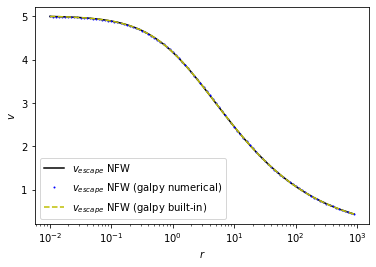

In [20]:
# same for vesc
plt.figure()
if pot_func:
    plt.plot(xax, vesc(xax, pot_func), 'k-', label='$v_{escape}$ '+label)
#else:
#    if plot_my_pot_numerical:
#        plt.plot(xax, vesc(xax, pot_numerical(xax, rho_func)), label='$v_{escape}$ '+label)
# add a line for the galpy numerical solution
plt.plot(xax, [pot_galpy_from_density.vesc(x) for x in xax], 'b.', ms=2, label='$v_{escape}$ '+label+' (galpy numerical)')
# add a line for galpy's built-in if it exists
if pot_galpy:
    plt.plot(xax, pot_galpy.vesc(xax), 'y--', label='$v_{escape}$ '+label+' (galpy built-in)')
# add axis labels
plt.xscale('log')
plt.xlabel('$r$')
plt.ylabel('$v$')
# add legend
plt.legend()
# save to file
plt.savefig(label+'_vesc.png')

**Look at these plots!** What do you learn from them?

Note that these figures are saved as PNG files with names ``Plummer_vc.png`` and ``Plummer_vesc.png``.

## 6. Try different mass distributions

**FIXME:** First, implement an NFW distribution in the ``rho_NFW`` and ``pot_NFW`` functions below.

In [4]:
def rho_NFW(r):
    "Density of an NFW model: BT equation 2.64."
    # FIXME: PUT IN YOUR CODE HERE
    return 1 / (r * (1.0 + r)**2)
    
def pot_NFW(r):
    "Analytic potential of an NFW model: BT equation 2.67."
    # FIXME: PUT IN YOUR CODE HERE
    return ((-4 * np.pi) * np.log(1 + r)) / (r)

Now go back up to section 3 and update ``rho_func``, ``pot_func``, ``label``, and ``pot_galpy`` appropriately (you may want to look at [the galpy documentation on potentials](https://docs.galpy.org/en/v1.7.0/reference/potential.html#specific-potentials)) and re-run all of the code to generate plots for the NFW distribution.

**Look at the plots.** How is the NFW density distribution different from the Plummer distribution? How are the potentials different? How are the circular and escape velocities different? How easily do you think you could observationally tell the difference between them?

## 7. Try something

Finally, try implementing another density distribution for which you don’t know the analytic form of the potential (note: if there is no analytic potential, then set ``pot_func=False``). Feel free to be creative rather than making it physically realistic! Pay attention to how sensitive the shape of the potential and of the velocities is to the shape of the density distribution, and think about what that means for observationally determining density distributions.

**Everyone please bring your plots**, not just the discussion leader, especially for the last part where everyone’s should look different!

In [456]:
def rho_new(r):
    "Density of new model"
    return 1.0 / (1.0 + r**3)

## 8. Plots

Here are my plots for each of the models from the exercises.

### Plummer Model

Potential | Density
:-----:|:-----:
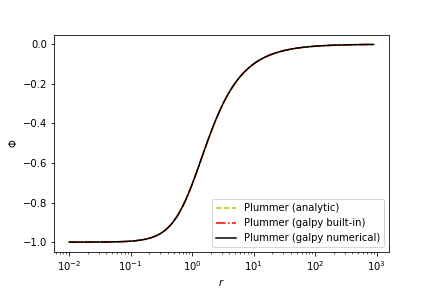 | 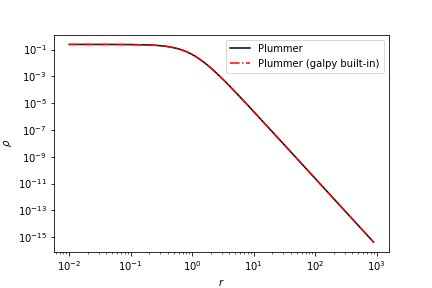

Circular Velocity | Escape Velocity
:-----:|:-----:
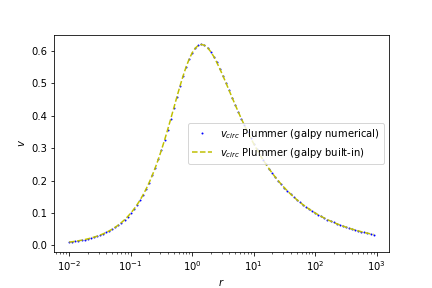 | 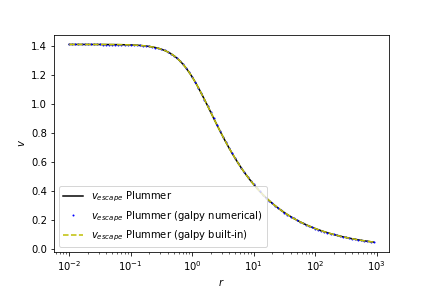

### NFW Model

Potential | Density
:-----:|:-----:
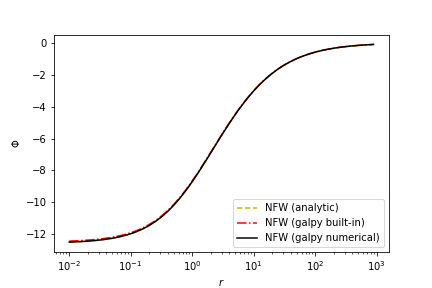 | 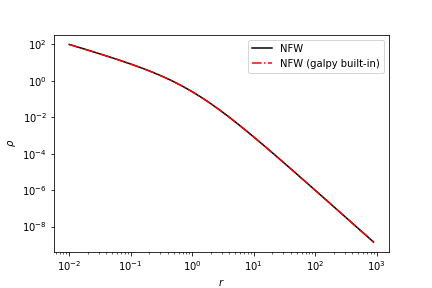

Circular Velocity | Escape Velocity
:-----:|:-----:
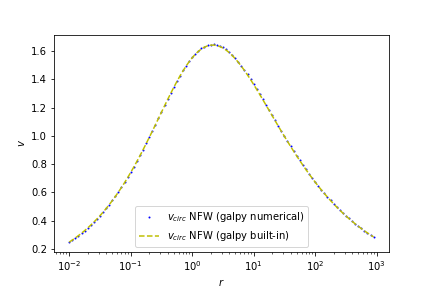 | 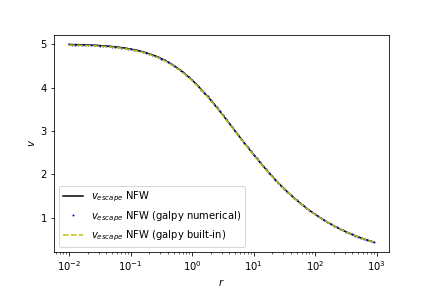

### My Model

Potential | Density
:-----:|:-----:
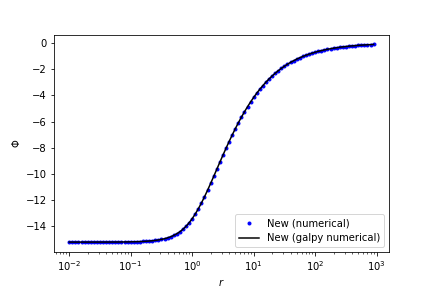 | 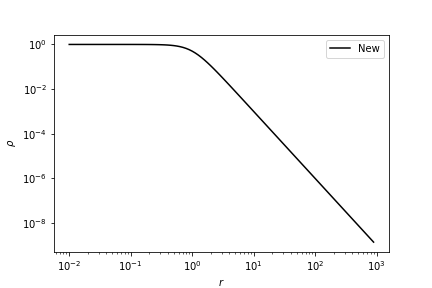

Circular Velocity | Escape Velocity
:-----:|:-----:
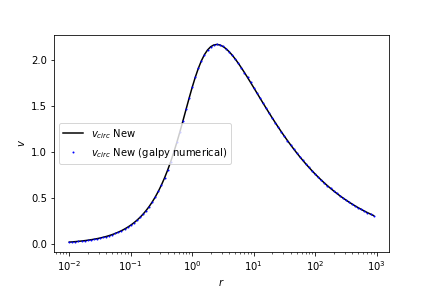 | 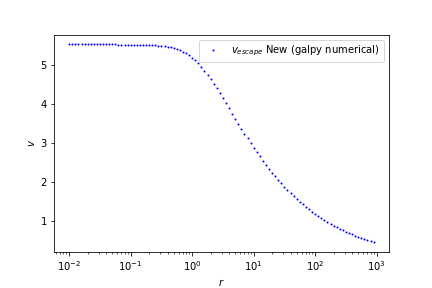

## 9. Comparisions

Here I compare the plots next to one another to better understand the differences.

### Potential

Plummer | NFW | My
:-----:|:-----: | :-----:
![Plummer_potential.png](Plummer_potential.png) | ![NFW_potential.png](NFW_potential.png) | ![New_potential.png](New_potential.png)

We can see that the potentials go towards zero as r go to infinity, which is what we would expect. The difference bewteen these is that the Plummer model and My model have sharper slopes which lead to faster decrease in the potential than the NFW model. The Plummer model has a smaller maximum than the NFW and My potentials.

### Density

Plummer | NFW | My
:-----:|:-----: | :-----:
![Plummer_density.png](Plummer_density.png) | ![NFW_density.png](NFW_density.png) | ![New_density.png](New_density.png)

The densities also follow what we would expect: decreasing as r goes to infinity. We do see that the NFW model has a more gradual decrease, while the Plummer and My models remain constant then decreasing more rapidly.

### Circular Velocity

Plummer | NFW | My
:-----:|:-----: | :-----:
![Plummer_vc.png](Plummer_vc.png) | ![NFW_vc.png](NFW_vc.png) | ![New_vc.png](New_vc.png)

We can see that the circular velocity for the NFW distribution is more broad and symmetric than the Plummer and My distributions. 

### Escape Velocity

Plummer | NFW | My
:-----:|:-----: | :-----:
![Plummer_vesc.png](Plummer_vesc.png) | ![NFW_vesc.png](NFW_vesc.png) | ![New_vesc.png](New_vesc.png)

Similar to the previous plots, we see that the NFW decreases more gradually than the others. 